# Trabajo Práctico 1 : Visualización de datos

## Analisis del dataset 'endorsements' con informacion acerca del respaldo politico a candidatos a presidente de los Estados Unidos desde 1980 al 2012

### Introduccion

Durante el periodo de elecciones presidenciales en los Estados Unidos, los representantes de cada partido politico hacen publico el respaldo a algun candidato que se presenta.

Este dataset sirve como herramienta para analizar la importancia del apoyo politico en el transcurso de la eleccion y como impacta en su resultado, cuantificando el respaldo en lo que denomina "endorsement points" o "puntos de apoyo", dandole un peso a ese respaldo segun el representante que lo expresa y su cargo publico.


### Como funcionan los puntos de apoyo?

Los puntos de apoyo son una cuantificacion del respaldo que ofrece el representante de un partido politico a un candidato, medido segun el cargo que ocupa al momento de expresarlo. El respaldo de los gobernadores pesa 10 puntos, el de los senadores 5 puntos y el respaldo del resto de los representantes pesa 1 punto. 

## Análisis exploratorio

Cargamos el dataset 'endorsements-june-30' del input FiveThirtyEight para su analisis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import zipfile

Dataset = "endorsements-june-30"

with zipfile.ZipFile("../input/fivethirtyeight/data/"+Dataset+".zip","r") as z:
    z.extractall(".")
    
data = pd.read_csv(Dataset+"/endorsements-june-30.csv")

#### Exploración inicial

Este es un set de datos de las elecciones que se llevaron a cabo en Estados Unidos desde 1980 hasta 2012 inclusive, a continuación se detallan las variables de los datos junto a sus tipos y una breve descripción. 

| Nombre                               | Tipo de variable      | Descripción                                                               |
|--------------------------------------|-----------------------|---------------------------------------------------------------------------|
| **Year**                             | Cuantitativa discreta | Indica el año electivo, va desde 1980 hasta 2012 con intervalos de 4 años |
| **Party**                            | Cualitativa binaria   | Indica si pertenece al partido Republicano o Democrático                  |
| **Candidate**                        | Cualitativa nominal   | Indica el nombre del candidato                                            |
| **Endorsement points**               | Cuantitativa discreta | Indica el apoyo politico al candidato cuantificado, por año             |
| **Percentage of endorsement points** | Cuantitativa continua | Indica el porcentaje de puntos de apoyo del candidato, por partido politico, por año           |
| **Money raised**                     | Cuantitativa continua | Indica el dinero recaudado para la campaña electoral por año                     |
| **Percentage of money**              | Cuantitativa continua | Indica el porcentaje del dinero recaudado por el candidato para la campaña electoral, por año, por partido politico       |
| **Primary vote percentage**          | Cuantitativa continua | Indica el porcentaje de votos obtenido por el candidato en las elecciones primarias, por año, por partido politico                 |
| **Won primary**                      | Cualitativa binaria   | Indica si ganó en elecciones primarias                                    |

Aquí se muestran las primeras y últimas 5 filas del set. Este set tiene un total de 109 filas, cada una tiene la información respectiva al candidato que se postuló, el año, el partido al que pertenece y cómo le fue en su campaña electoral.

In [2]:
data

,year,party,candidate,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage,won_primary
0,1980,Republican,George H.W. Bush,5,6.32911,1475332.00,16.83,23.81,No
1,1980,Republican,Lowell Weicker,0,0.00000,60000.00,0.68,0.00,No
2,1980,Republican,Phil Crane,0,0.00000,2500000.00,28.53,0.76,No
3,1980,Republican,John Connally,6,7.59494,2200000.00,25.10,0.64,No
4,1980,Republican,Bob Dole,0,0.00000,253286.00,2.89,0.06,No
...,...,...,...,...,...,...,...,...,...
104,2012,Republican,Ron Paul,6,9.09091,4514165.68,14.13,10.89,No
105,2012,Republican,Mitt Romney,42,63.63640,18195222.87,56.95,52.17,Yes
106,2012,Republican,Michele Bachmann,0,0.00000,4288335.65,13.42,0.21,No
107,2012,Republican,Rick Perry,0,0.00000,0.00,0.00,0.28,No


Se puede ver que no hay valores nulos en ninguna columna (por valores nulos se entiende valores que no tienen el dato y que en su lugar figura 'NaN').

In [3]:
data.isna().sum()

year                             0
party                            0
candidate                        0
endorsement_points               0
percentage_endorsement_points    0
money_raised                     0
percentage_of_money              0
primary_vote_percentage          0
won_primary                      0
dtype: int64

### Variables cualitativas

A continuacion se detallan las variables cualitativas que aparecen en el dataset


| Nombre                               | Tipo de variable      |
|--------------------------------------|-----------------------|
| **Partido politico**                            | Cualitativa binaria   |
| **Candidato**                        | Cualitativa nominal   |
| **Gano elecciones primarias**                      | Cualitativa binaria   |


A continuación se detalla por cada variable cualitativa sus valores posibles y la cantidad de filas que contienen dicho valor.

In [4]:
cant_partidos_a = data[['party']].groupby(['party'])['party'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
cant_partidos_b = pd.DataFrame({'variable': ['party'] * len(cant_partidos_a)})
cant_partidos = pd.concat([cant_partidos_b, cant_partidos_a], axis=1)
cant_partidos.columns = ['Variable', 'Valor', 'Cantidad']

cant_candidatos_a = data[['candidate']].groupby(['candidate'])['candidate'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
cant_candidatos_b = pd.DataFrame({'variable': ['candidate'] * len(cant_candidatos_a)})
cant_candidatos = pd.concat([cant_candidatos_b, cant_candidatos_a], axis=1)
cant_candidatos.columns = ['Variable', 'Valor', 'Cantidad']

cant_primarias_a = data[['won_primary']].groupby(['won_primary'])['won_primary'].count().reset_index(name='count')
cant_primarias_b = pd.DataFrame({'variable': ['won_primary'] * len(cant_primarias_a)})
cant_primarias = pd.concat([cant_primarias_b, cant_primarias_a], axis=1)
cant_primarias.columns = ['Variable', 'Valor', 'Cantidad']

cant_cualitativas = pd.concat([cant_primarias, cant_partidos, cant_candidatos])
cant_cualitativas

,Variable,Valor,Cantidad
0,won_primary,No,97
1,won_primary,Yes,12
0,party,Democratic,48
1,party,Republican,61
0,candidate,Al Gore,2
...,...,...,...
85,candidate,Tom Tancredo,1
86,candidate,Tom Vilsack,1
87,candidate,Tommy Thompson,1
88,candidate,Walter Mondale,1


Aquí vemos que las variables **won_primary** y **party** tienen dos valores posibles cada una, siendo *Yes/No* y *Democratic/Republican* respectivamente. Para el caso de la variable **candidate** hay 90 valores posibles, siendo estos los nombres completos de cada candidato.

In [5]:
def simple_barplot(df, x, y, label):
    plt.figure(dpi=150)
    sns.set_style("darkgrid")
    ax = sns.barplot(x=x, y=y, data=df ,alpha=0.5, orient='v')
    ax.set_title(label)
    ax.set_xlabel(x)
    ax.set_ylabel('Cantidad')
    if len(df) > 5:
        plt.xticks(rotation=90)
    plt.show()

### Partido político (party)

Hay dos pertidos políticos: el Republicano y el Demócrata, teniendo el dataset 61 registros del primero y 48 del segundo.

In [6]:
data_partidos = data[['party']].groupby(['party'])['party'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_partidos.columns = ['Partido politico', 'Cantidad de registros']
data_partidos

,Partido politico,Cantidad de registros
1,Republican,61
0,Democratic,48


In [7]:
data[['party']].value_counts()

party     
Republican    61
Democratic    48
dtype: int64

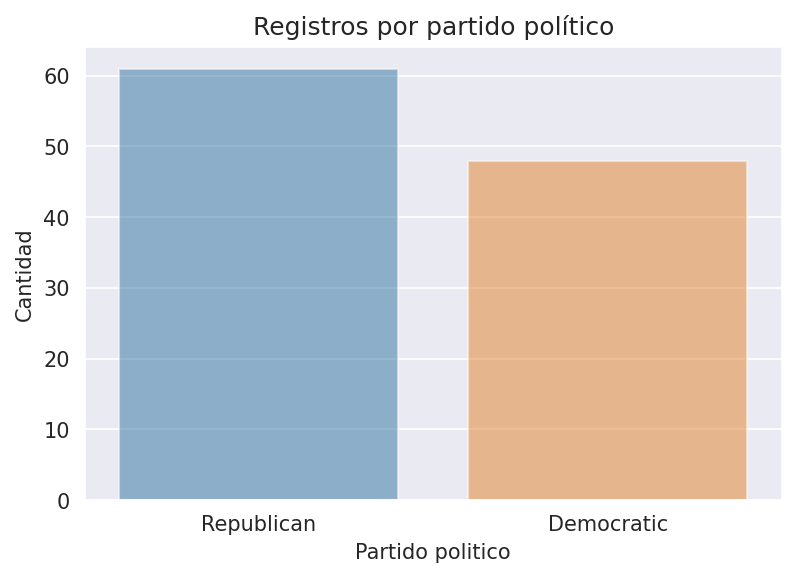

In [8]:
simple_barplot(data_partidos, 'Partido politico', 'Cantidad de registros', "Registros por partido político")

### Candidato (candidate)

En éste dataset se registran 89 candidatos diferentes, de los cuales dos de ellos se presentaron tres veces, 15 se presentaron dos veces y el resto sólo se presentaron una única vez.

In [9]:
data_candidatos = data[['candidate']].groupby(['candidate'])['candidate'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_candidatos.columns = ['Candidato', 'Cantidad de registros']
data_candidatos

,Candidato,Cantidad de registros
3,Alan Keyes,3
10,Bob Dole,3
0,Al Gore,2
79,Ron Paul,2
31,Gary Hart,2
...,...,...
30,Gary Bauer,1
29,Fred Thompson,1
28,Eugene McCarthy,1
27,Ernest Hollings,1


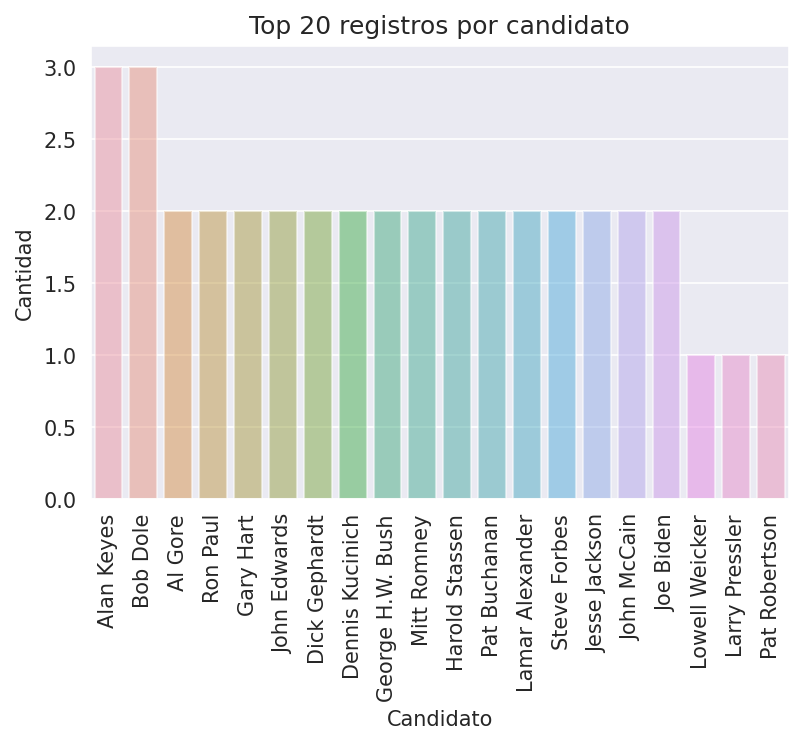

In [10]:
simple_barplot(data_candidatos.head(20), 'Candidato', 'Cantidad de registros', "Top 20 registros por candidato")

### Ganó elecciones primarias (won_primary)

De todos los registros, en sólo doce de ellos lograron ganar las elecciones primarias.

In [11]:
data_primarias = data[['won_primary']].groupby(['won_primary'])['won_primary'].count().reset_index(name='count')
data_primarias.columns = ['Gano elecciones primarias', 'Cantidad de registros']
data_primarias

,Gano elecciones primarias,Cantidad de registros
0,No,97
1,Yes,12


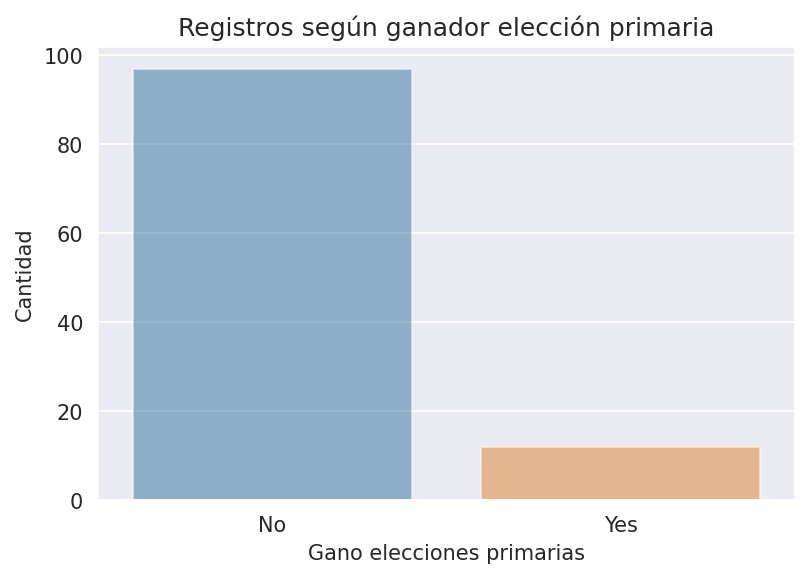

In [12]:
simple_barplot(data_primarias, 'Gano elecciones primarias', 'Cantidad de registros', "Registros según ganador elección primaria")

Estos gráficos no tendría sentido compararlos mediante un histograma. El histograma nos sirve cuando el soporte es continuo (es decir cuando la variable que queremos ver su distribución es continua) y en este caso estamos comparando cantidades de variables cualitativas/categóricas. Al estar comparando variables categóricas, cada "barrita" o columna del gráfico de barra representa un grupo definido por la categoría.

## Variables Cuantitativas
Para el estudio de estas variables se separará el dataset en dos subsets, uno para el partido Demócrata y otro para el Republicano y se verá qué tanto influye el partido en los datos.

In [13]:
data_dem = data[data['party'] == 'Democratic']
data_rep = data[data['party'] == 'Republican']

A continuación se analizan las medidas de resumen para el set general y los dos subsets.

In [14]:
data_cpy = data[['year', 'endorsement_points', 'percentage_endorsement_points', 'money_raised', 'percentage_of_money', 'primary_vote_percentage']]
mode = data_cpy.mode(numeric_only=True)
quantiles = data_cpy.quantile([0.25, 0.75])
pd.concat([data_cpy.agg(['mean','median']), mode.rename(index={0: "mode"}), quantiles, data_cpy.agg(['min','max'])])

,year,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
mean,1996.917431,17.59633,10.091742,5.225899e+06,11.008991,10.807431
median,1996.000000,2.00000,0.735294,1.567088e+06,5.680000,0.910000
mode,2008.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000
0.25,1988.000000,0.00000,0.000000,1.388260e+05,0.360000,0.110000
0.75,2008.000000,16.00000,9.565220,4.288336e+06,15.970000,14.170000
min,1980.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000
max,2012.000000,382.00000,96.124000,6.198149e+07,80.910000,75.390000


In [15]:
data_cpy = data_dem[['year', 'endorsement_points', 'percentage_endorsement_points', 'money_raised', 'percentage_of_money', 'primary_vote_percentage']]
mode = data_cpy.mode(numeric_only=True)
quantiles = data_cpy.quantile([0.25, 0.75])
pd.concat([data_cpy.agg(['mean','median']), mode.rename(index={0: "mode"}), quantiles, data_cpy.agg(['min','max'])])

,year,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
mean,1995.5,12.770833,10.416664,6.078372e+06,12.500208,12.1500
median,1992.0,3.500000,2.494090,1.117911e+06,6.715000,1.7800
mode,1988.0,0.000000,0.000000,0.000000e+00,0.000000,0.0000
0.25,1988.0,0.000000,0.000000,9.438426e+04,0.175000,0.2125
0.75,2004.0,14.250000,11.948525,6.720860e+06,18.115000,18.3850
min,1984.0,0.000000,0.000000,0.000000e+00,0.000000,0.0000
max,2008.0,124.000000,96.124000,6.198149e+07,80.910000,75.3900


In [16]:
data_cpy = data_rep[['year', 'endorsement_points', 'percentage_endorsement_points', 'money_raised', 'percentage_of_money', 'primary_vote_percentage']]
mode = data_cpy.mode(numeric_only=True)
quantiles = data_cpy.quantile([0.25, 0.75])
pd.concat([data_cpy.agg(['mean','median']), mode.rename(index={0: "mode"}), quantiles, data_cpy.agg(['min','max'])])

,year,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
mean,1998.032787,21.393443,9.836066,4.555101e+06,9.835574,9.750984
median,2000.000000,0.000000,0.000000,1.914747e+06,3.520000,0.640000
mode,2008.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
0.25,1988.000000,0.000000,0.000000,2.017450e+05,0.560000,0.040000
0.75,2008.000000,18.000000,7.913670,3.416826e+06,13.810000,10.890000
min,1980.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
max,2012.000000,382.000000,76.861200,3.614054e+07,62.200000,67.900000


De estas tablas se puede deducir lo siguiente:
* El rango de años y la información que se tiene para cada uno no es pareja entre partidos, es decir, hay años para los cuales hay más datos de un partido que de otro (incluso en años como 1980 y 2012 no hay datos correspondientes al pertido Democráta). Esto significa que puede haber un sesgo en la información que tenemos a pesar de que sólo haya 13 registros más de candidatos republicanos que demócratas.
* Hay diferencia en los puntos de apoyo obtenidos, siendo el partido Republicano el que más obtuvo. Esto se ve fácilmente al comparar las dos medias siendo 12.77 la del Demócrata y 21.39 la del Republicano, y el valor máximo de cada uno, siendo 124 y 382 respectivamente. Otro detalle a tener en cuenta es la desviación estándar, la del Demócrata es 24.93 y la del Republicano es 57.46, significa que en éste último hay mayor diferencia entre candidatos.
* Otra diferencia importante se da en el dinero recaudado, siendo el partido Demócrata el que tiene los valores más altos.

#### **Correlación de Pearson** para el set principal y el subset de cada partido:

Para el set principal:

<AxesSubplot:>

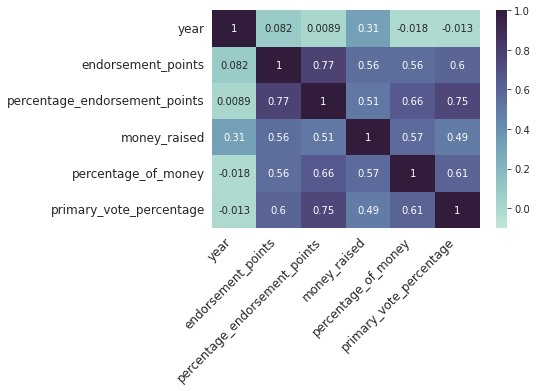

In [17]:
import matplotlib.pyplot as plt
heatmap = sns.heatmap(data.corr(), vmin=-0.1, vmax=1, annot=True, cmap=sns.color_palette("ch:start=.5,rot=-.50", as_cmap=True))
heatmap.set_xticklabels(
    heatmap.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontweight='light',
    fontsize='large'
)
heatmap

Para el subset con el partido Demócrata:

<AxesSubplot:>

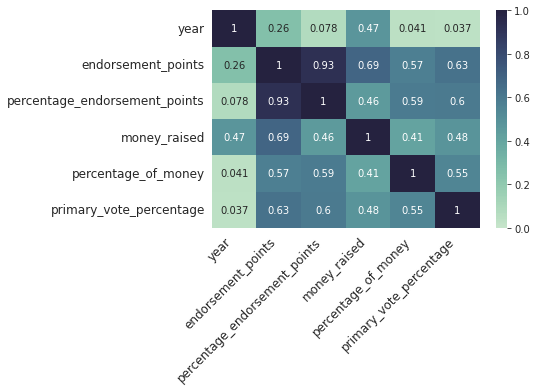

In [18]:
heatmap = sns.heatmap(data_dem.corr(), vmin=0, vmax=1, annot=True, cmap=sns.color_palette("ch:start=.25,rot=-.50", as_cmap=True))
heatmap.set_xticklabels(
    heatmap.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontweight='light',
    fontsize='large'
)
heatmap

Y finalmente para el subset con el partido Republicano:

<AxesSubplot:>

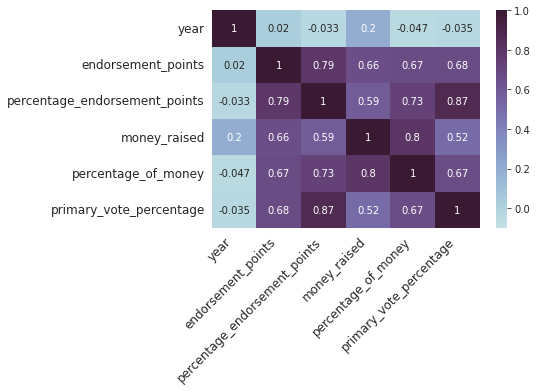

In [19]:
heatmap = sns.heatmap(data_rep.corr(), vmin=-0.1, vmax=1, annot=True, cmap=sns.color_palette("ch:start=.75,rot=-.50", as_cmap=True))
heatmap.set_xticklabels(
    heatmap.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontweight='light',
    fontsize='large'
)
heatmap

En estos valores se puede ver que la correlación entre el año y las otras variables es positiva en todos los casos del partido Demócrata pero no en todos los casos del partido Republicano. Además, en los casos en donde ambos son positivos los valores en el patido Demócrata son mayores. Esto quiere decir que a medida que pasan los años va aumentando el apoyo que recibe el partido Demócrata.  
Para el resto de pares de variables ambos partidos tienen correlaciones de Pearson similares.

A continuación se muestran 3 gráficos, en ellos se compara de a pares las variables cuantitativas para el set principal y los dos subsets antes mencionados.

Para el set principal:

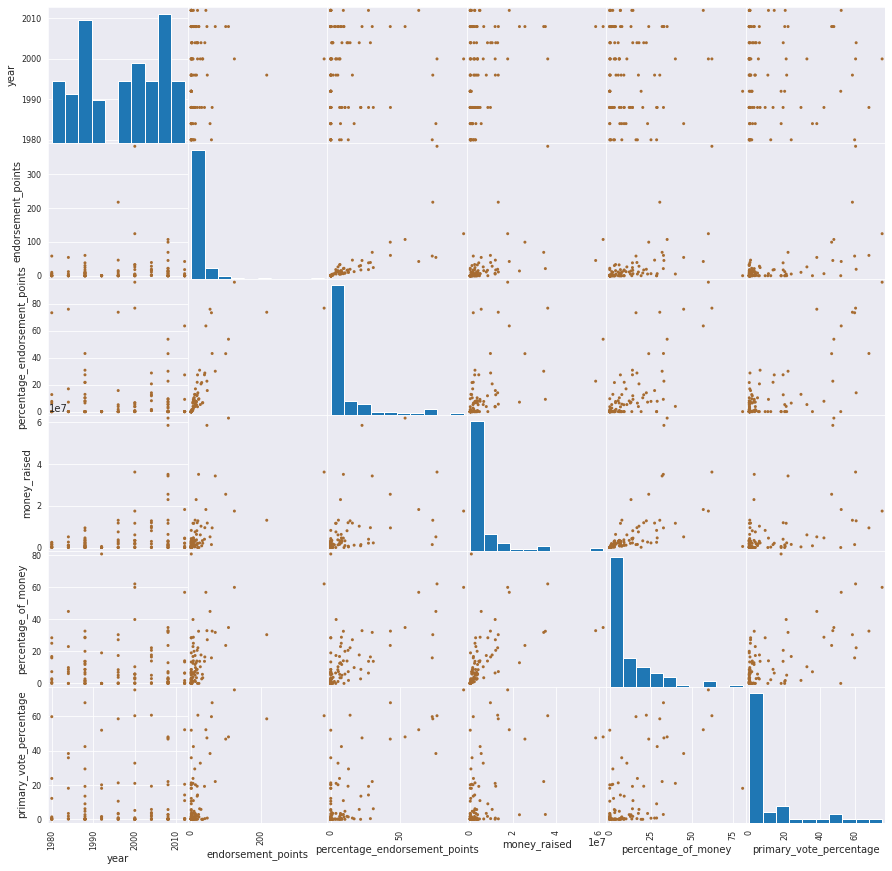

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=1, figsize = (15,15), c='#a76c31');

Para el subset con el partido Demócrata (en violeta), y con el partido Republicano (en verde)

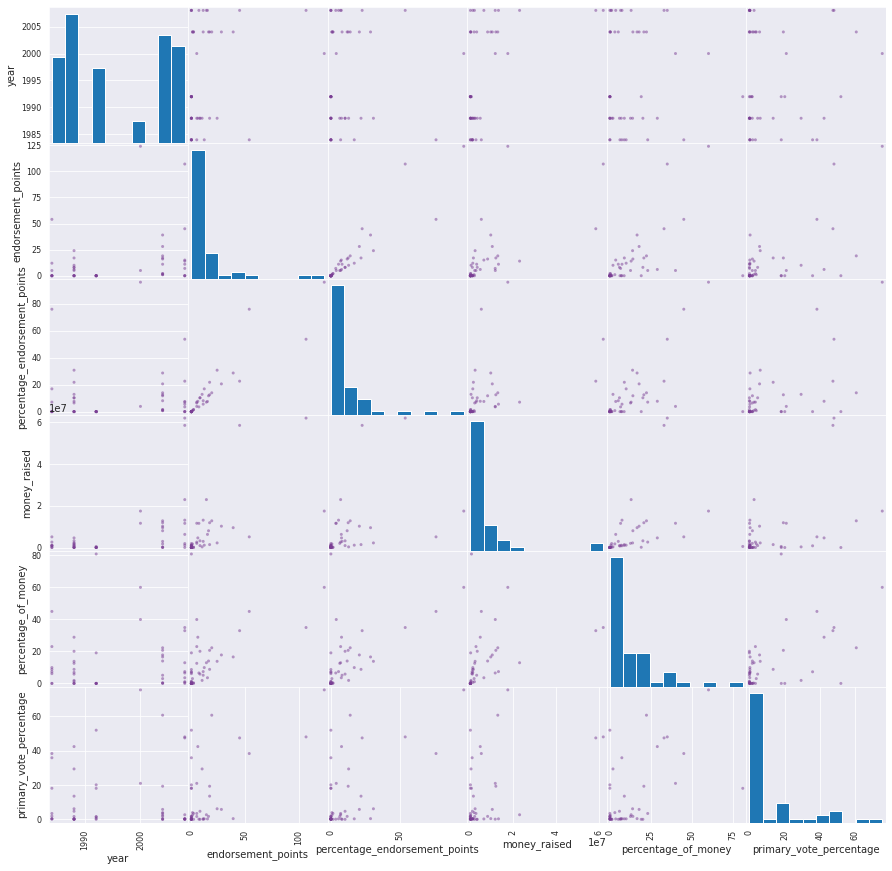

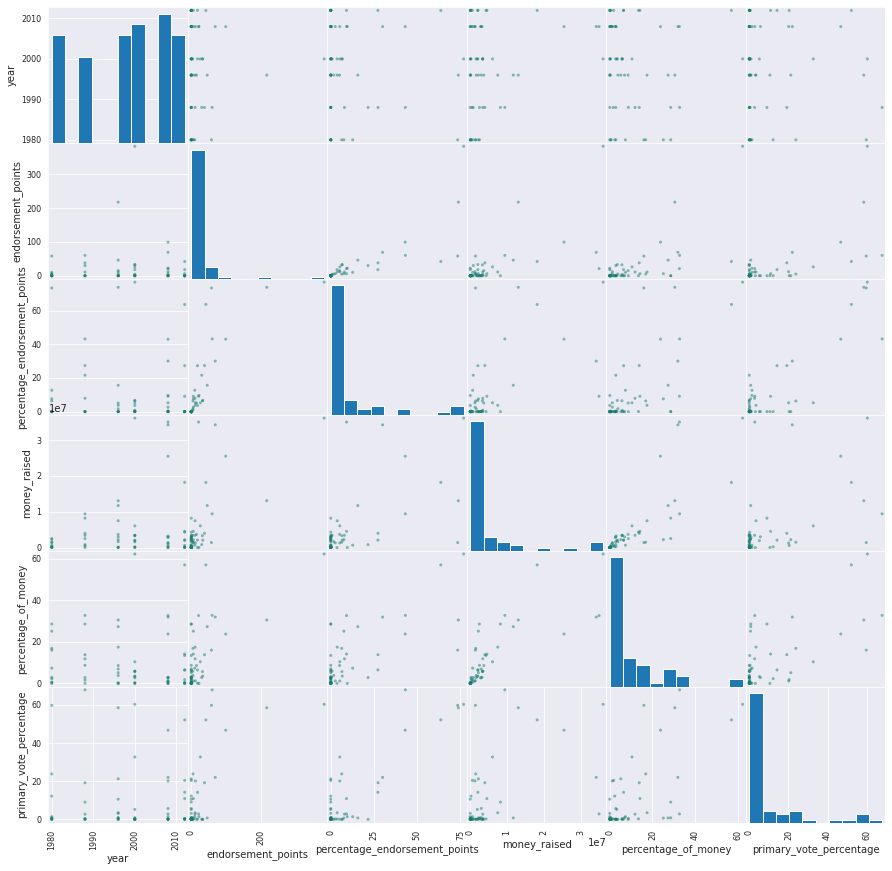

In [21]:
scatter_matrix(data_dem, figsize = (15,15), c='#7a3e94');
scatter_matrix(data_rep, figsize = (15,15), c='#177d6f');

#### Histogramas de las variables **puntos de apoyo** y **porcentaje de votos en elecciones primarias**  
(Violeta = Partido Demócrata || Verde = Partido Republicano)

<AxesSubplot:title={'center':'Cantidad de votos de apoyo'}, ylabel='Frequency'>

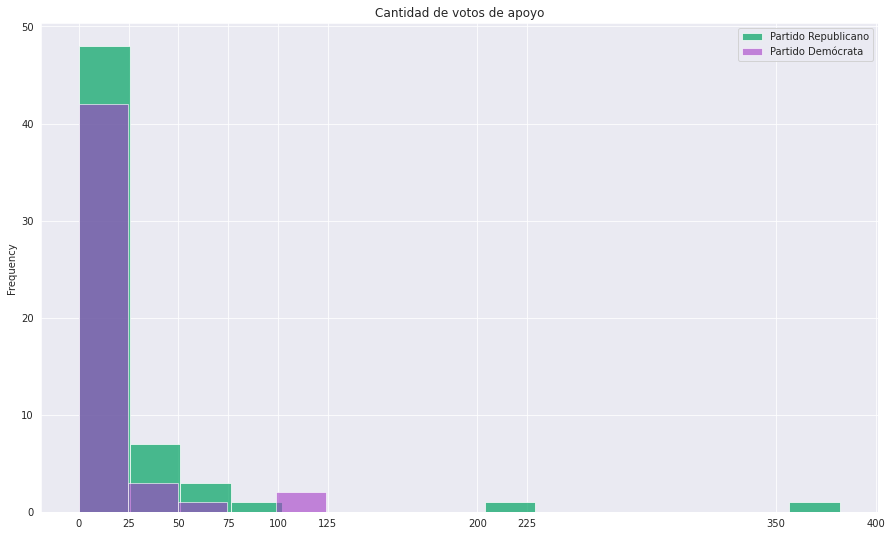

In [22]:
ticks=(0, 25, 50, 75, 100, 125, 200, 225, 350, 400)
data_rep['endorsement_points'].plot.hist(bins=15, color='#02a363', alpha=0.7,figsize=(15,9), label='Partido Republicano', legend=True, xticks=ticks) # Más bins ya que el máximo es mucho mayor
data_dem['endorsement_points'].plot.hist(bins=5, color='#a43bc7', alpha=0.6, title='Cantidad de votos de apoyo', label='Partido Demócrata', legend=True)


<AxesSubplot:title={'center':'Dinero recaudado (decenas de millones)'}, ylabel='Frequency'>

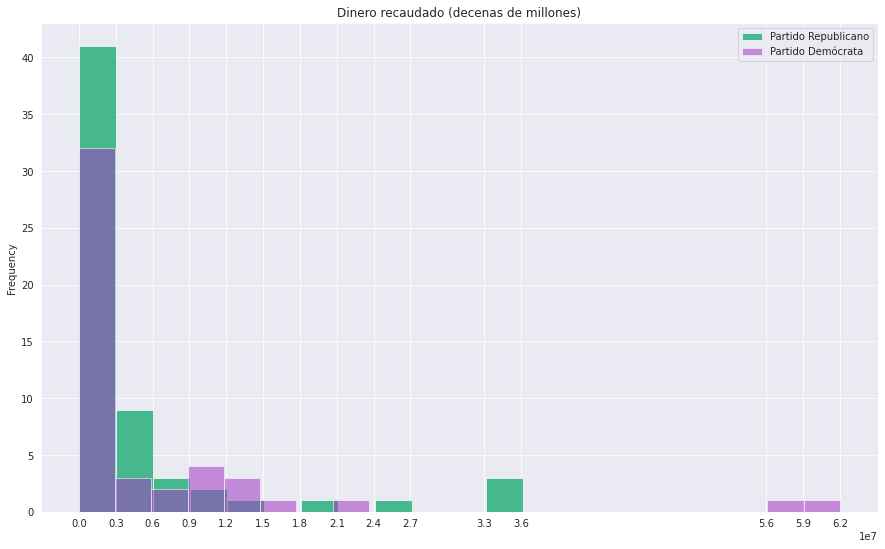

In [23]:
ticks = (0, 3*10**6, 6*10**6, 9*10**6, 12*10**6, 15*10**6, 18*10**6, 21*10**6, 24*10**6, 27*10**6, 33*10**6, 36*10**6, 56*10**6, 59*10**6, 62*10**6)
data_rep['money_raised'].plot.hist(bins=12, color='#02a363', alpha=0.7,figsize=(15,9), label='Partido Republicano', legend=True) # Menos bins ya que el máximo es menor
data_dem['money_raised'].plot.hist(bins=21, color='#a43bc7', alpha=0.55, title = 'Dinero recaudado (decenas de millones)', label='Partido Demócrata', legend=True, xticks=ticks)

En estos histogramas se puede ver que la minoría de candidatos pudo superar los 25 puntos de apoyo, de ellos la mayoría pertenece al partido Republicano, además dentro del partido Demócrata es casi tan probable para un candidato que haya obtenido entre 25 y 50 puntos como entre 100 y 125.  
Respecto al dinero recaudado el grueso de los candidatos recaudó menos de 15 millones, dentro del Partido Demócrata son más los candidatos que recaudaron entre nueve y 15 milloes que los que recaudaron entre tres y nueve millones, y dentro del Partido Republicano es casi tan probable para un candidato que haya recaudado entre seis y nueve millones como entre 33 y 36 millones.

#### Analisis de puntos de respaldo politico y dinero recaudado, por partido politico

En el siguiente grafico se puede observar que los candidatos del partido republicano acumulan mas respaldo politico que los democratas

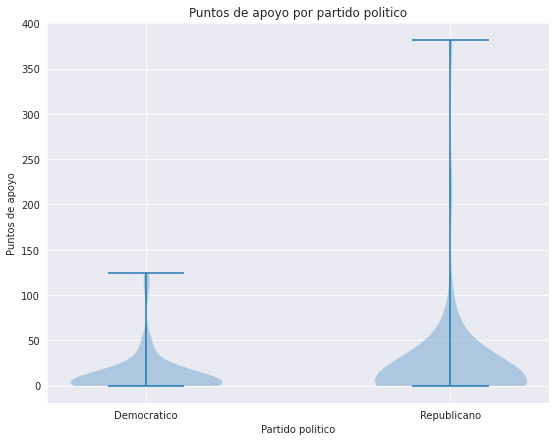

In [24]:
df = data[['party', 'endorsement_points']]

fig, axes = plt.subplots(figsize=(9,7))

#specify x-axis locations
x_ticks = [1, 2]

#specify x-axis labels
x_labels = ['Democratico','Republicano'] 

axes.violinplot(dataset = [df[df.party == 'Democratic']["endorsement_points"].values,
                           df[df.party == 'Republican']["endorsement_points"].values] )

axes.set_title('Puntos de apoyo por partido politico')
axes.yaxis.grid(True)
axes.set_xlabel('Partido politico')
axes.set_ylabel('Puntos de apoyo')

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.show()

En este otro grafico se observa que, a pesar de que los republicanos tendieron a acumular mayor respaldo politico, los candidatos del partido democrata siguen siendo elegidos por los votantes

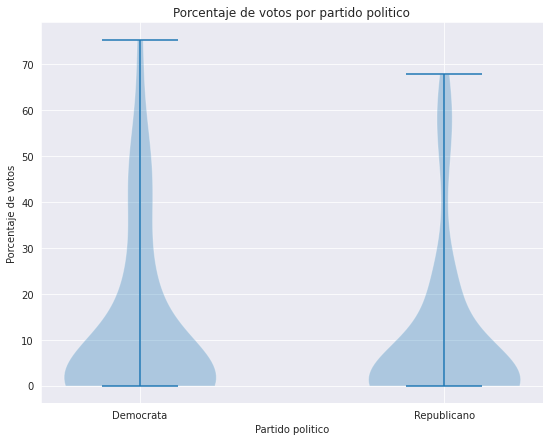

In [25]:
df = data[['party', 'primary_vote_percentage']]

fig, axes = plt.subplots(figsize=(9,7))

#specify x-axis locations
x_ticks = [1, 2]

#specify x-axis labels
x_labels = ['Democrata','Republicano'] 

axes.violinplot(dataset = [df[df.party == 'Democratic']["primary_vote_percentage"].values,
                           df[df.party == 'Republican']["primary_vote_percentage"].values] )

axes.set_title('Porcentaje de votos por partido politico')
axes.yaxis.grid(True)
axes.set_xlabel('Partido politico')
axes.set_ylabel('Porcentaje de votos')

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.show()

A continuación se analizará la cantidad de puntos de apoyo y de votos en elecciones primarias según si el candidato ganó o no las elecciones primarias.

En el gráfico a continuación se puede ver como los candidatos que no ganaron las elecciones primarias no tuvieron una cantidad alta de puntos de apoyo, pero quienes sí las ganaron tuvieron una cantidad de puntos de apoyo bastante variada y teniendo su grueso en una cantidad menor a 100 puntos.  
Esto significa que si un candidato tiene muchos puntos de apoyo es bastante probable que gane las elecciones primarias, pero si obtuvo una cantidad menor (menor a 100 puntos) la certeza baja bastante: para casos en donde los puntos van de 50 a 100 el candidato tiene cierta probabilidad de ganar, y para los casos de menos de 50 puntos se da la mayor incertidumbre, tal que no se podría predecir si el candidato va a ganar o no.

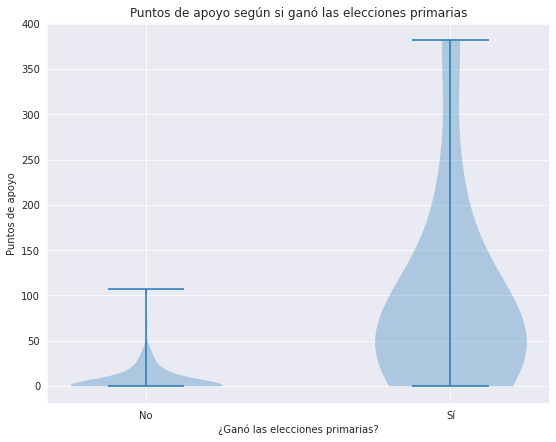

In [26]:
df = data[['won_primary', 'endorsement_points']]

fig, axes = plt.subplots(figsize=(9,7))

#specify x-axis locations
x_ticks = [1, 2]

#specify x-axis labels
x_labels = ['No','Sí'] 

axes.violinplot(dataset = [df[df.won_primary == 'No']["endorsement_points"].values,
                           df[df.won_primary == 'Yes']["endorsement_points"].values] )

axes.set_title('Puntos de apoyo según si ganó las elecciones primarias')
axes.yaxis.grid(True)
axes.set_xlabel('¿Ganó las elecciones primarias?')
axes.set_ylabel('Puntos de apoyo')

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.show()

Para el caso del porcentaje de votos según si el candidato ganó en las elecciones primarias, es mucho más seguro hacer una predicción, dado que todos los que ganaron tuvieron entre un 40 y un 80% de los votos, y en los porcentajes menores al 30% se encuentra la mayor parte de candidatos que no ganaron las elecciones.

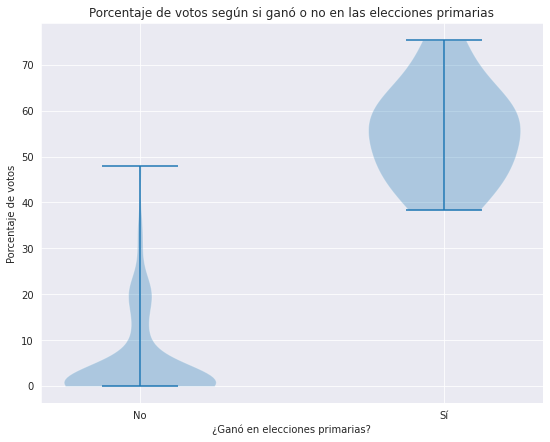

In [27]:
df = data[['won_primary', 'primary_vote_percentage']]

fig, axes = plt.subplots(figsize=(9,7))

#specify x-axis locations
x_ticks = [1, 2]

#specify x-axis labels
x_labels = ['No','Sí'] 

axes.violinplot(dataset = [df[df.won_primary == 'No']["primary_vote_percentage"].values,
                           df[df.won_primary == 'Yes']["primary_vote_percentage"].values] )

axes.set_title('Porcentaje de votos según si ganó o no en las elecciones primarias')
axes.yaxis.grid(True)
axes.set_xlabel('¿Ganó en elecciones primarias?')
axes.set_ylabel('Porcentaje de votos')

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.show()

En cuanto al dinero recaudado, se observa que dos candidatos democratas Barack Obama y Hillary Clinton, en el año 2008, son los que mas dinero han recaudado durante las elecciones, superando a los republicanos con mayor respaldo economico Rudy Giuliani y George W. Bush casi por el doble de su recaudacion

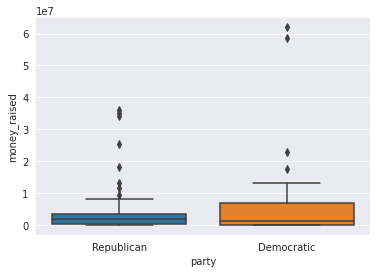

In [28]:
ax = sns.boxplot(x='party', y= 'money_raised', data=data)

In [29]:
data_filter = data[data['candidate'].isin(['Barack Obama', 'Hillary Clinton', 'Rudy Giuliani', 'George W. Bush'])]
data_filter[['year', 'party', 'candidate', 'money_raised']].style.format({"money_raised": "{:,.0f}"})

,year,party,candidate,money_raised
61,2000,Republican,George W. Bush,"36,140,543"
82,2008,Republican,Rudy Giuliani,"35,035,339"
91,2008,Democratic,Barack Obama,"58,496,362"
93,2008,Democratic,Hillary Clinton,"61,981,487"


<AxesSubplot:ylabel='Density'>

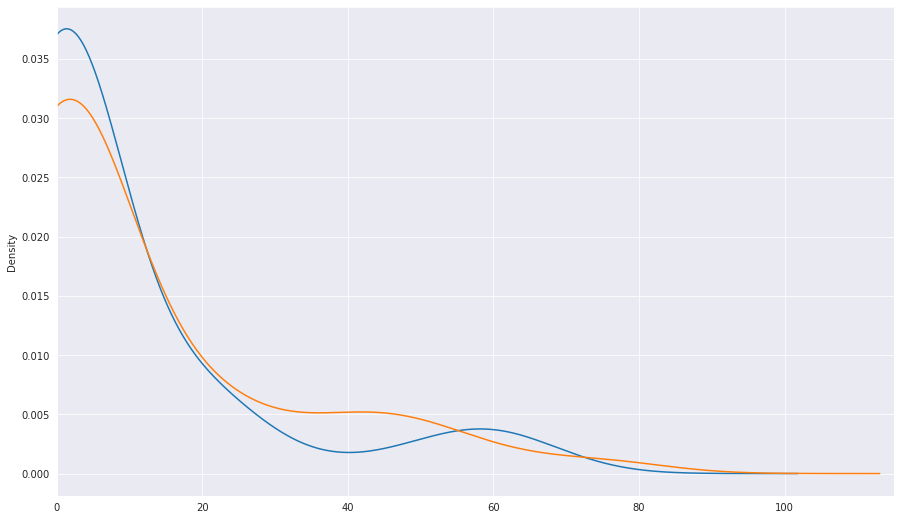

In [30]:
data_rep['primary_vote_percentage'].plot.kde(figsize=(15,9), xlim=(0, 115))
data_dem['primary_vote_percentage'].plot.kde()

<AxesSubplot:ylabel='Density'>

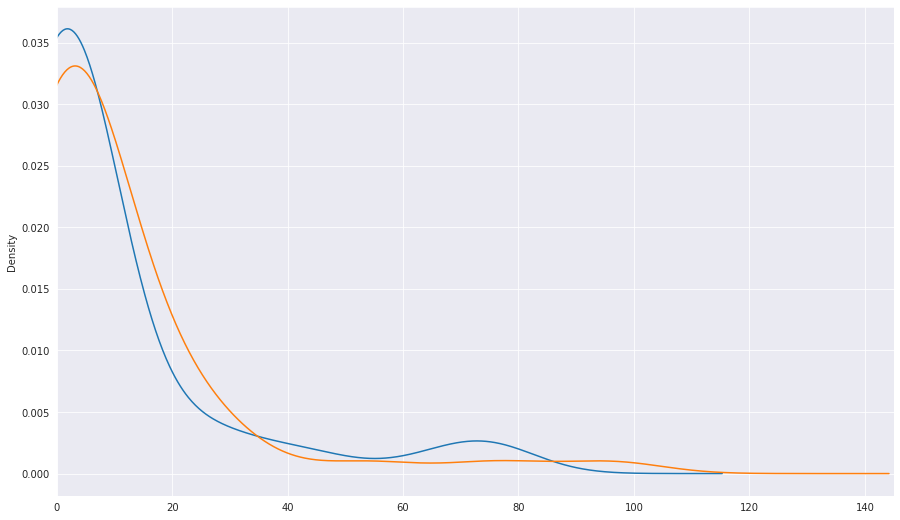

In [31]:
data_rep['percentage_endorsement_points'].plot.kde(figsize=(15,9), xlim=(0, 145))
data_dem['percentage_endorsement_points'].plot.kde()

<AxesSubplot:ylabel='Density'>

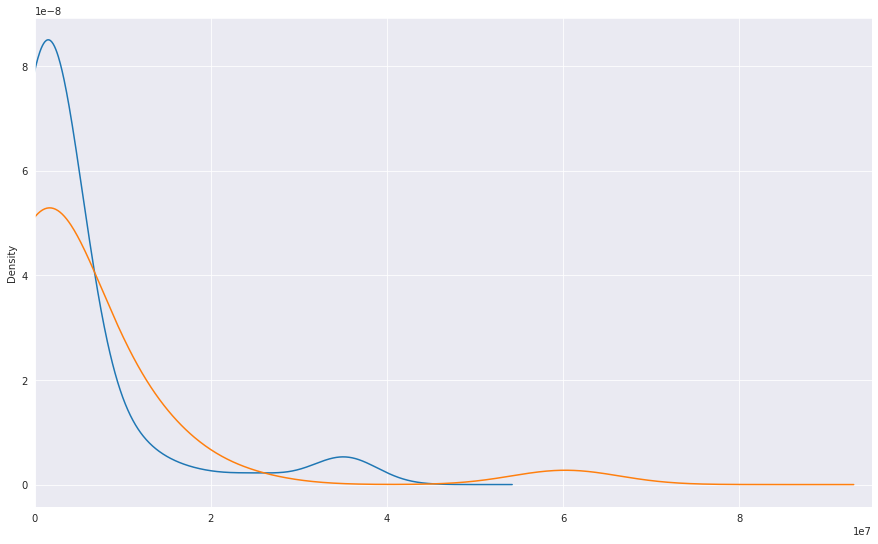

In [32]:
data_rep['money_raised'].plot.kde(figsize=(15,9), xlim=(0, 9.5 * 10**7))
data_dem['money_raised'].plot.kde()

#### Referencias

Mehta, D. (2022, April 6). fivethirtyeight/data. Endorsements through June 30. https://github.com/fivethirtyeight/data/blob/master/endorsements-june-30/README.md

# Spotify
Spotify es un servicio de música, podcasts y videos digitales que brinda acceso a millones de canciones y otro contenido de creadores de todo el mundo. Spotify está disponible en una variedad de dispositivos, que incluyen computadoras, teléfonos, tabletas, parlantes, televisores y automóviles, y se puede pasar fácilmente de uno a otro.
### Servicio de música
La app permite buscar artistas, discos y canciones puntuales, agregarlos a playlists propias o guardar playlists creadas por amigos, familiares, influencers o por la propia app. En las playlists de la app se pueden encontrar playlists por artista, género músical, hits de la semana/mes/temporada, entre otras tantas, incluso hay playlists dedicadas a estados emocionales o activividades puntuales.

In [33]:
# Parte 2 - Preguntas de investigación

# Luego de la entrada en calor les proponemos trabajar con un nuevo set de datos (disponible
# para descargar en el siguiente link ) y les planteamos los siguientes objetivos:
# 1.- Explorar el set de datos de forma libre aplicando las técnicas que consideren adecuadas
# (vistas en la materia)
# 2.- A partir de la exploración realizada plantear dos preguntas de investigación que les resulten
# interesantes para formular sobre los datos propuestos. Por ejemplo, ¿existe alguna relación
# entre el género musical y alguna de las otras variables?
# 3.- Elegir dos visualizaciones (como mínimo) que permitan abordar sus preguntas de
# investigación e interpretar los resultados.

data_spotify = pd.read_csv("../input/d/datasets/elianaharriet/spotify/datset_spotify.csv")

## Sobre el dataset

A continuación se muestra un resumen de cómo es el dataset, qué variables tiene y los valores que toma cada una. Este set tiene 1000 registros, cada uno aportando datos sobre una canción puntual, y 11 variables que describen la canción.

In [34]:
data_spotify

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99.0,0.04210,0.726,190440.0,0.554,0.1060,-5.290,0.0917,169.999,0.3350
1,Dance,83.0,0.10900,0.775,208787.0,0.613,0.1340,-4.586,0.0542,100.066,0.7970
2,Dance,87.0,0.04410,0.737,222653.0,0.636,0.3500,-4.546,0.0437,105.005,0.5650
3,Dance,78.0,0.02030,0.586,220573.0,0.701,0.0550,-5.326,0.0416,104.957,0.2540
4,Dance,72.0,0.42200,0.728,200773.0,0.646,0.0899,-4.387,0.0463,103.983,0.4600
...,...,...,...,...,...,...,...,...,...,...,...
995,Soul,42.0,0.73300,0.587,146693.0,0.380,0.3930,-8.912,0.0251,85.214,0.6380
996,Soul,43.0,0.00152,0.445,175427.0,0.637,0.1290,-5.672,0.0342,89.847,0.0863
997,Soul,41.0,0.00280,0.508,303640.0,0.619,0.1110,-7.072,0.1950,91.895,0.2470
998,Soul,44.0,0.42600,0.674,246787.0,0.571,0.1230,-5.675,0.0842,97.126,0.5110


Para saber el significado de cada variable a continuación se escpecifica la descripción de cada una. En este caso se cuenta con una única variable cualitativa (genre), siendo el resto variables cuantitativas contínuas.

| Variable       	| Descripción                                      	|
|----------------	|--------------------------------------------------	|
| _genre_        	| Género musical correspondiente a la canción.     	|
| _popularity_   	| índice de popularidad de la canción              	|
| _acousticness_ 	| medida de confianza de si la canción es acústica 	|
| _danceability_ 	| adecuación para ser bailada                      	|
| _duration_ms_  	| duración                                         	|
| _energy_       	| perceptiva de intensidad                         	|
| _liveness_     	| presencia de audiencia en la grabación           	|
| _loudness_     	| volumen                                          	|
| _speechiness_  	| presencia de palabras en la canción              	|
| _tempo_        	| golpes por minuto                                	|

A continuación se revisa la cantidad de datos nulos por columna.

In [35]:
data_spotify.isna().sum()

genre           0
popularity      0
acousticness    0
danceability    0
duration_ms     0
energy          0
liveness        0
loudness        0
speechiness     0
tempo           0
valence         0
dtype: int64

Para saber qué tan distribuidas están las canciones según el género musical a continuación se hace un conteo.

In [36]:
data_spotify['genre'].value_counts(ascending=True)

Soul          64
Opera         72
Classical     72
Dance         75
Reggae        76
Reggaeton     78
World         79
Folk          80
Hip-Hop       80
Rock          80
Electronic    81
Jazz          81
Pop           82
Name: genre, dtype: int64

Como la duración en milisegundos no da información a simple vista, se pasará a minutos. De esta forma es mucho más entendible la duración si se lee que dura 3.342217 minutos, a diferencia de 200533 milisegundos que es el mismo valor.

In [37]:
def ms_to_min(ms):
    return ms/60000
data_spotify['duration_ms'] = data_spotify['duration_ms'].apply(ms_to_min)
data_spotify.rename(columns={'duration_ms':'duration_min'}, inplace=True)
data_spotify

,genre,popularity,acousticness,danceability,duration_min,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99.0,0.04210,0.726,3.174000,0.554,0.1060,-5.290,0.0917,169.999,0.3350
1,Dance,83.0,0.10900,0.775,3.479783,0.613,0.1340,-4.586,0.0542,100.066,0.7970
2,Dance,87.0,0.04410,0.737,3.710883,0.636,0.3500,-4.546,0.0437,105.005,0.5650
3,Dance,78.0,0.02030,0.586,3.676217,0.701,0.0550,-5.326,0.0416,104.957,0.2540
4,Dance,72.0,0.42200,0.728,3.346217,0.646,0.0899,-4.387,0.0463,103.983,0.4600
...,...,...,...,...,...,...,...,...,...,...,...
995,Soul,42.0,0.73300,0.587,2.444883,0.380,0.3930,-8.912,0.0251,85.214,0.6380
996,Soul,43.0,0.00152,0.445,2.923783,0.637,0.1290,-5.672,0.0342,89.847,0.0863
997,Soul,41.0,0.00280,0.508,5.060667,0.619,0.1110,-7.072,0.1950,91.895,0.2470
998,Soul,44.0,0.42600,0.674,4.113117,0.571,0.1230,-5.675,0.0842,97.126,0.5110


Para conocer cómo son las variables cuantitativas a continuación se muestran las medidas de resumen.

In [38]:
data_spotify.describe()

,popularity,acousticness,danceability,duration_min,energy,liveness,loudness,speechiness,tempo,valence
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.557000,0.364932,0.572353,4.139592,0.558100,0.199484,-9.604198,0.090560,116.719245,0.458050
std,16.818252,0.352764,0.192730,1.896251,0.255879,0.179012,6.122038,0.093099,30.049075,0.263528
min,2.000000,0.000006,0.078100,0.552667,0.002930,0.012300,-37.728000,0.023800,52.645000,0.027300
25%,33.000000,0.047300,0.443000,3.210163,0.390750,0.095500,-11.178750,0.037175,92.889750,0.243000
50%,45.000000,0.220000,0.601500,3.743333,0.602500,0.123000,-7.767500,0.049750,115.028500,0.446000
75%,57.000000,0.695750,0.722000,4.606992,0.753000,0.239500,-5.549750,0.095250,136.942750,0.678500
max,99.000000,0.996000,0.951000,29.128883,0.998000,0.987000,-0.762000,0.675000,209.767000,0.980000


A continuación se presenta un histograma para la duración (en minutos) de las canciones.

<AxesSubplot:ylabel='Frequency'>

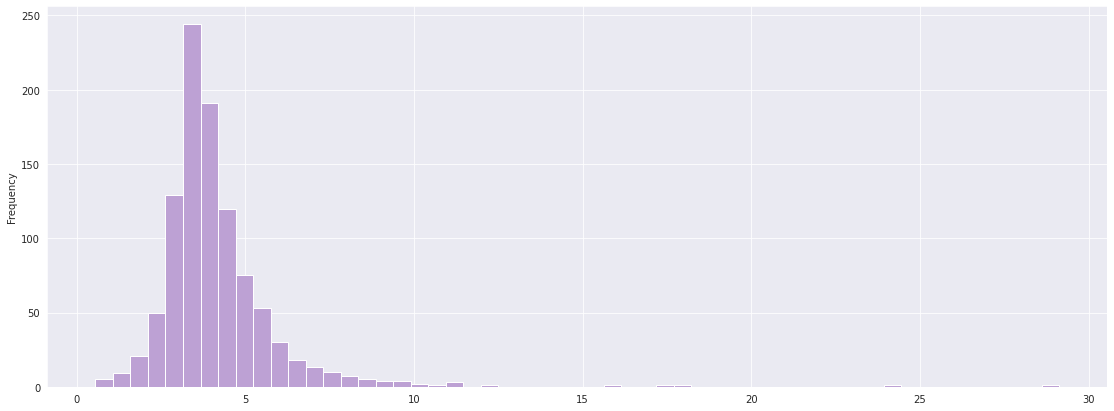

In [39]:
data_spotify['duration_min'].plot.hist(bins=55, figsize=(19,7), color=['#bda1d4'])

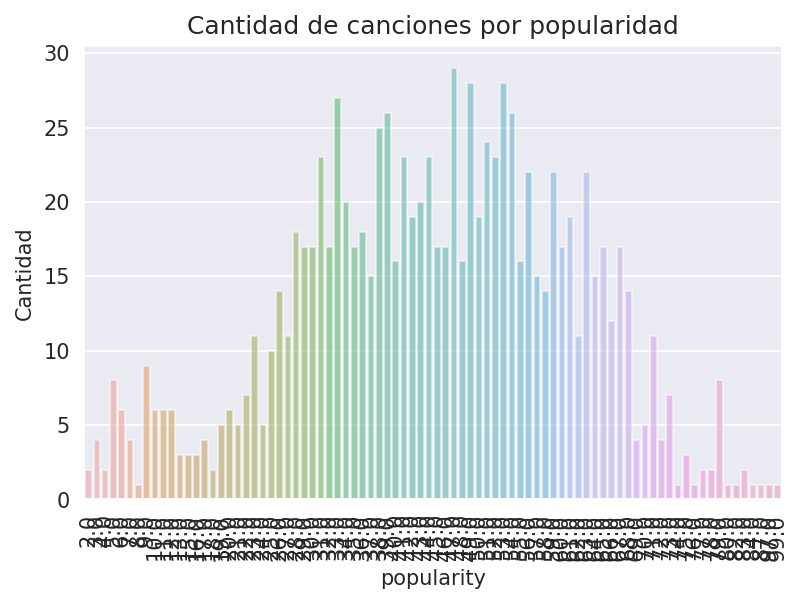

In [40]:
spotify_count = data_spotify[['popularity']].groupby(['popularity'])['popularity'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
simple_barplot(spotify_count, 'popularity', 'count', 'Cantidad de canciones por popularidad')

In [41]:
# df = pd.to_datetime(data_spotify[['duration_min']].sort_values(by=['duration_min'], ascending=True)['duration_min'], unit='min').dt.time.to_frame().reset_index()
# df = df[['duration_min']]
# df.columns = ['duration']
# df

Podriamos quedarnos con las canciones que duren mas de un minuto y menos de seis

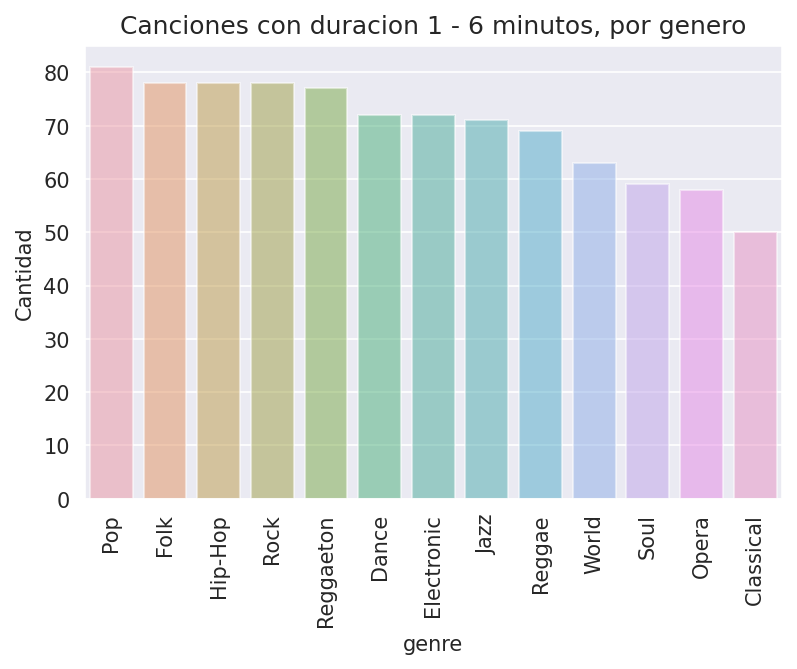

In [42]:
spotify_duration = data_spotify[(data_spotify['duration_min'] > 1) & (data_spotify['duration_min'] < 6)].reset_index()
#spotify_duration[['genre']].groupby(['genre'])['genre'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
simple_barplot(spotify_duration[['genre']].groupby(['genre'])['genre'].count().reset_index(name='count').sort_values(by=['count'], ascending=False), 'genre', 'count', 'Canciones con duracion 1 - 6 minutos, por genero')

O las mas populares

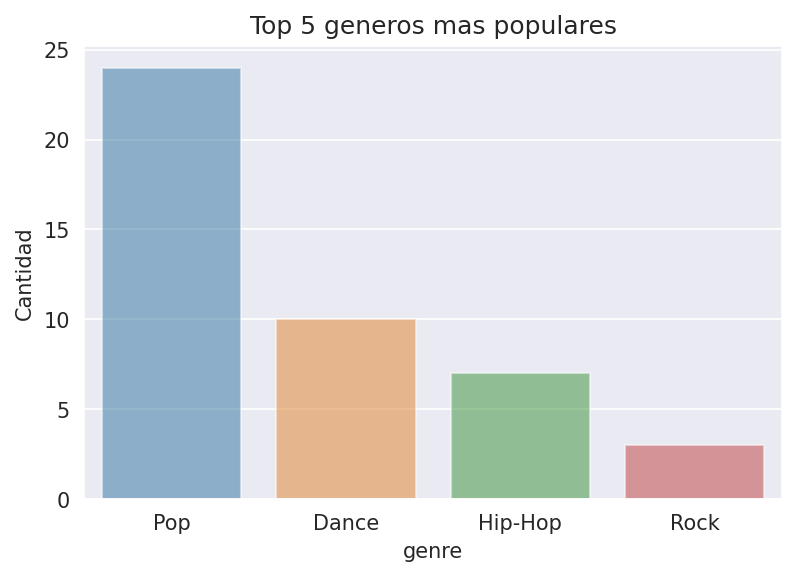

In [43]:
popular = data_spotify[(data_spotify['popularity'] > 70)].reset_index()

simple_barplot(popular[['genre']].groupby(['genre'])['genre'].count().reset_index(name='count').sort_values(by=['count'], ascending=False).head(4), 'genre', 'count', 'Top 5 generos mas populares')